iter:  1
centroid:  [[-5.89820129  3.16846839]
 [ 3.1414649  -1.88825469]]


<ipython-input-4-51acb14639eb>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
<ipython-input-4-51acb14639eb>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()


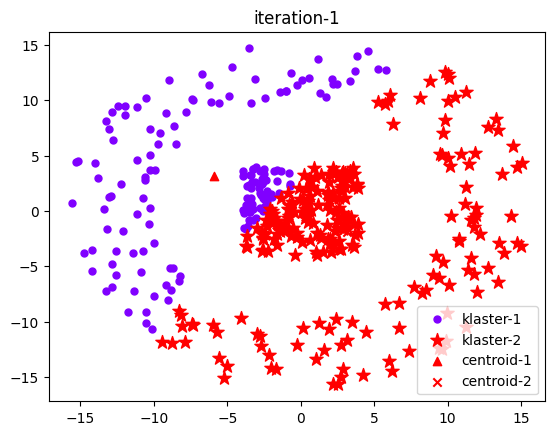

iter:  2
centroid:  [[-5.84294201  2.46964852]
 [ 3.64889567 -1.68346494]]


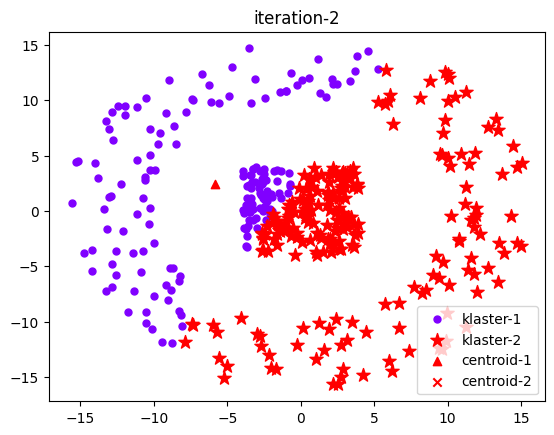

iter:  3
centroid:  [[-5.75748398  1.91902597]
 [ 4.09836667 -1.45595205]]


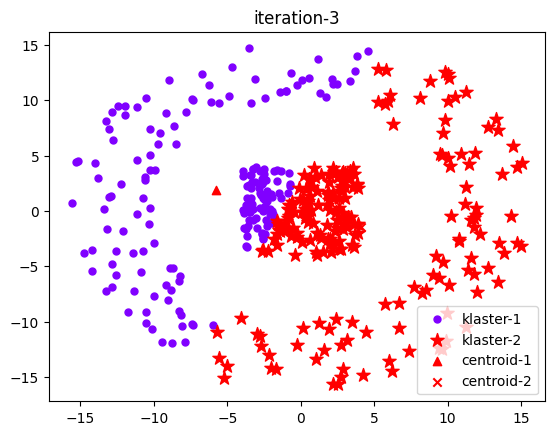

iter:  4
centroid:  [[-5.6699801   1.39592775]
 [ 4.48997081 -1.13938756]]


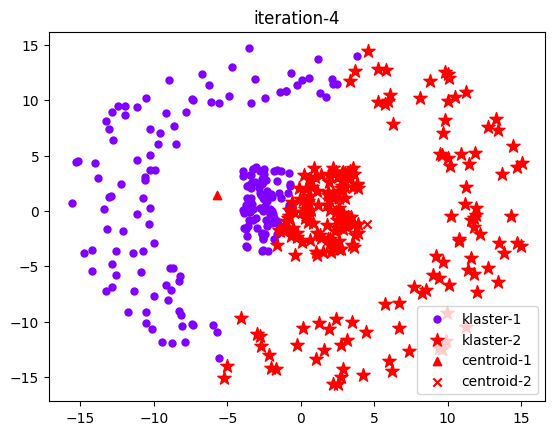

iter:  5
centroid:  [[-5.51116238  0.96621337]
 [ 4.89238636 -0.84184293]]


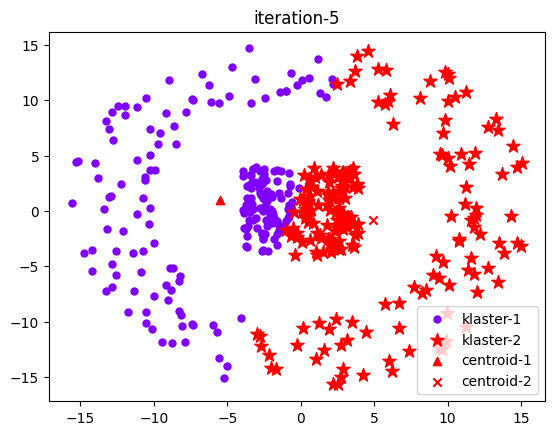

iter:  6
centroid:  [[-5.53523529  0.61317206]
 [ 5.02360051 -0.49284133]]


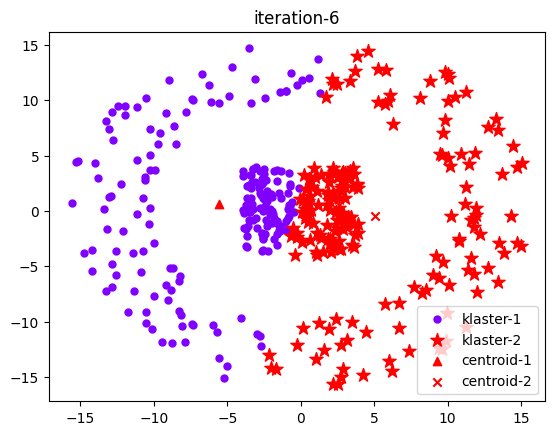

iter:  7
centroid:  [[-5.51978738  0.33821359]
 [ 5.11605103 -0.21227732]]


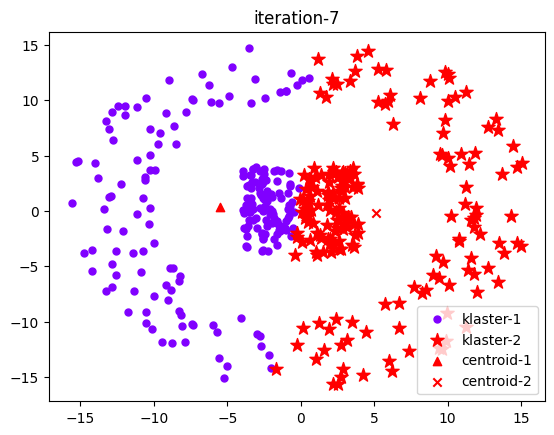

iter:  8
centroid:  [[-5.53076262  0.21056214]
 [ 5.12770515 -0.0767299 ]]


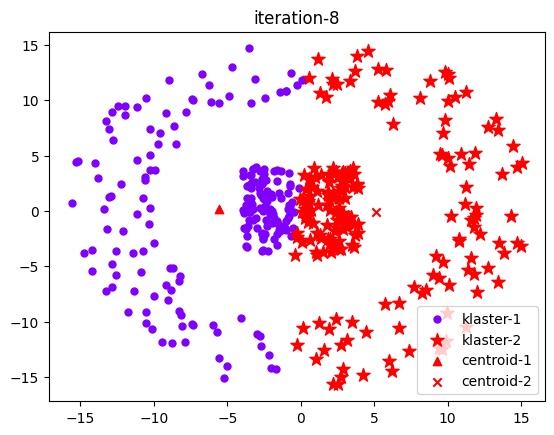

iter:  9
centroid:  [[-5.48152837  0.1584875 ]
 [ 5.18539375 -0.02330833]]


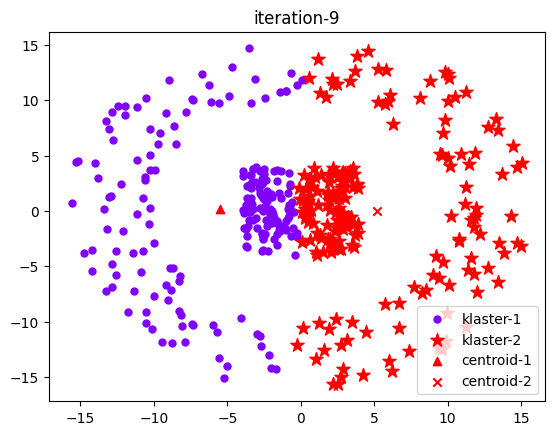

iter:  10
centroid:  [[-5.48262548  0.1115375 ]
 [ 5.18658229  0.02755417]]


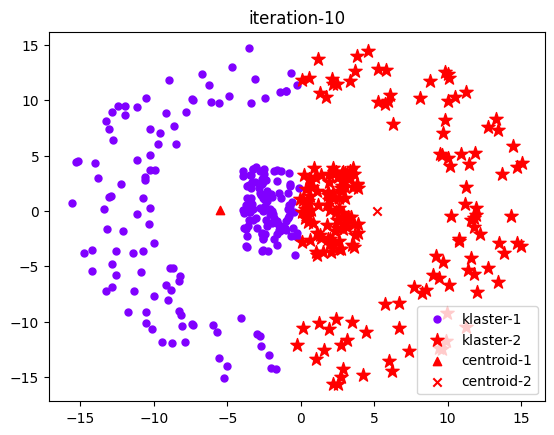

iter:  11
centroid:  [[-5.48326827  0.04338029]
 [ 5.18727865  0.10139115]]


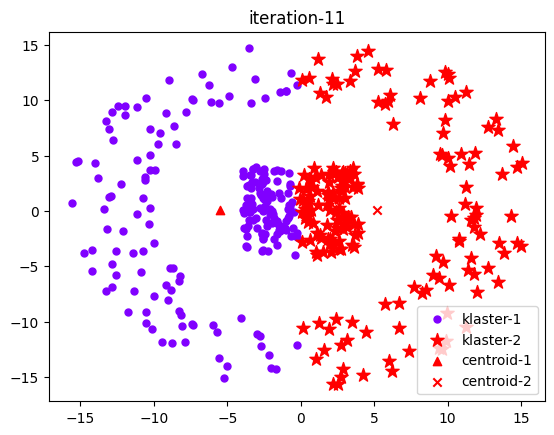

iter:  12
centroid:  [[-5.48326827  0.04338029]
 [ 5.18727865  0.10139115]]


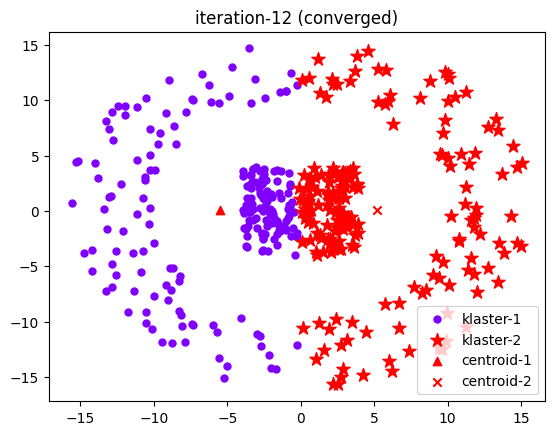

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

# Read dataset from file
datasetPath = "/dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")  # Load dataset
input = dataset  # Assign to input data

# Define k-means parameters
k = 2  # number of clusters
iterationCounter = 0  # iteration counter

# Function to initialize centroids randomly
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

# Function to plot clustering result per iteration
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-" + str(i + 1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.legend()
        plt.show(block=True)

# Main k-means algorithm function
def kMeans(data, centroidInit):
    nCluster = k  # number of clusters
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # Loop until convergence
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        # Repeat for all clusters
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            # Calculate Euclidean distance
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        # Assign data to the nearest cluster
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):  # assign data to cluster based on cluster matrix
            listClusterMember[clusterMatrix[i].item()].append(data[i,:])  # Use .item() instead of np.asscalar()
        # Calculate the new centroids
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        # Break the loop if converged
        if((centroidInit == newCentroid).all()):
            break
        # Update centroids with new values
        centroidInit = newCentroid
        # Plot the cluster results
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)  # Add a 1-second pause to make the plot readable
    return listClusterMember, centroidInit

# Initialize centroids and run k-means
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)

# Plot final clustering result after convergence
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)
